# Dicision Tree

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(x_train, y_train)

print(f"train acc: {tree.score(x_train, y_train): 0.2f}")
print(f"test acc: {tree.score(x_test, y_test): 0.2f}")

train acc:  1.00
test acc:  0.94


In [4]:
# max_depth는 연속된 질문의 개수 제한 / tree의 깊이를 제한
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(x_train, y_train)

print(f"train acc: {tree.score(x_train, y_train): 0.2f}")
print(f"test acc: {tree.score(x_test, y_test): 0.2f}")

train acc:  0.99
test acc:  0.95


In [5]:
!pip install graphviz

In [20]:
# visualization
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, class_names = ["neg", "pos"], 
                    feature_names = cancer.feature_names,
                   impurity = False, filled = True)
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(tree)

FileNotFoundError: [Errno 2] "dot" not found in path.

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


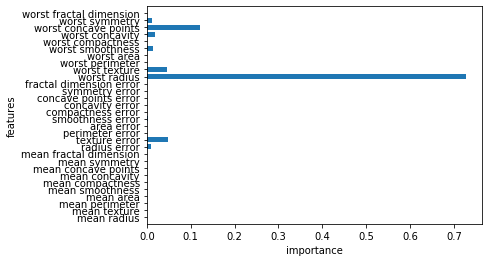

In [30]:
import matplotlib.pyplot as plt
import numpy as np

print(tree.feature_importances_)

def plot_feature_importnaces_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = "center")
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("importance")
    plt.ylabel("features")
    plt.ylim(-1, n_features)

plot_feature_importnaces_cancer(tree)

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(x_train, y_train)

print(f"train acc: {forest.score(x_train, y_train): 0.2f}")
print(f"test acc: {forest.score(x_test, y_test): 0.2f}")

train acc:  1.00
test acc:  0.97


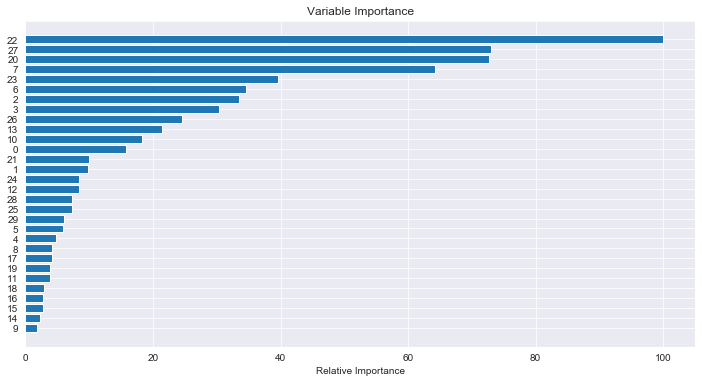

In [41]:
def plot_feature_importance(model, X_train, figsize=(12, 6)):
    import seaborn as sns
    import pandas as pd
    
    sns.set_style('darkgrid')
    
    X_train = pd.DataFrame(X_train)
    
    # Plot feature importance
    feature_importance = model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5

    plt.figure(figsize=figsize)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X_train.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()

plot_feature_importance(forest, x_train)

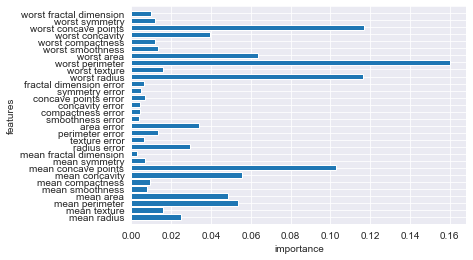

In [44]:
plot_feature_importnaces_cancer(forest)

Feature ranking:
1. feature 22 (0.160277)
2. feature 27 (0.117118)
3. feature 20 (0.116573)
4. feature 7 (0.103054)
5. feature 23 (0.063469)
6. feature 6 (0.055395)
7. feature 2 (0.053727)
8. feature 3 (0.048616)
9. feature 26 (0.039237)
10. feature 13 (0.034202)
11. feature 10 (0.029215)
12. feature 0 (0.025154)
13. feature 21 (0.016031)
14. feature 1 (0.015638)
15. feature 24 (0.013564)
16. feature 12 (0.013429)
17. feature 28 (0.011643)
18. feature 25 (0.011641)
19. feature 29 (0.009607)
20. feature 5 (0.009370)
21. feature 4 (0.007691)
22. feature 8 (0.006577)
23. feature 17 (0.006575)
24. feature 19 (0.006271)
25. feature 11 (0.006078)
26. feature 18 (0.004606)
27. feature 16 (0.004488)
28. feature 15 (0.004321)
29. feature 14 (0.003606)
30. feature 9 (0.002827)


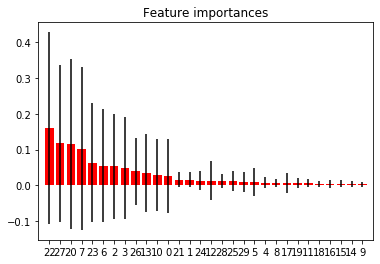

In [38]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

# Gradient Boosting
---
약한 분류기 여러 개를 합쳐서 학습 

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0)
gbrt.fit(x_train, y_train)

print(f"train acc: {gbrt.score(x_train, y_train): 0.2f}")
print(f"test acc: {gbrt.score(x_test, y_test): 0.2f}")

train acc:  1.00
test acc:  0.97


In [48]:
# overfitting 방지를 위해 max_depth, learning_rate 약하게 조정
from sklearn.ensemble import GradientBoostingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1, learning_rate = 0.01)
gbrt.fit(x_train, y_train)

print(f"train acc: {gbrt.score(x_train, y_train): 0.2f}")
print(f"test acc: {gbrt.score(x_test, y_test): 0.2f}")

train acc:  0.93
test acc:  0.96


# Bagging
---
Bootstrap Aggregating

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
bagging = BaggingClassifier(LogisticRegression(), n_estimators = 100,
                           oob_score = True, n_jobs = -1, random_state = 42)
bagging.fit(x_train, y_train)

print(f"train acc: {bagging.score(x_train, y_train): 0.2f}")
print(f"test acc: {bagging.score(x_test, y_test): 0.2f}")
print(f"oob score: {bagging.oob_score_: 0.2f}")

train acc:  0.96
test acc:  0.96
oob score:  0.95


# Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state = 0)
ada = AdaBoostClassifier(n_estimators = 5, random_state = 42)
ada.fit(x_train, y_train)

print(f"train acc: {ada.score(x_train, y_train): 0.2f}")
print(f"test acc: {ada.score(x_test, y_test): 0.2f}")

train acc:  0.96
test acc:  0.94
